<a><img src="https://ibm.box.com/shared/static/ugcqz6ohbvff804xp84y4kqnvvk3bq1g.png" width="200" align="center"></a>

<h1>Analyzing Where Do People Drink?  </h1>
<h2>Description</h2>

This Dataset is from the story <a href=https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/>  Dear Mona Followup: Where Do People Drink The Most Beer, Wine And Spirits? </a>  The dataset contains Average serving sizes per person such as average wine, spirit, beer servings. As well as several other metrics. You will be asked to analyze the data and predict the total liters served given the servings. See how to share your lab at the end.

You will need the following libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

<b>1.0 Importing the Data</b>

Load the csv:

In [2]:
df= pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/edx/project/drinks.csv')

We use the method  <code>head()</code>  to display the first 5 columns of the dataframe:

In [3]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


<b>Question 1</b>:  Display the data types of each column using the attribute dtype.

In [4]:
# dtypes displays the data types present in the data  
# the below output refers 
# 2 objects
# 2 int of type 64 
# 1 float of type 64 

df.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

<b>Question 2</b> use the method <code>groupby</code> to get the number of wine servings per continent:

In [5]:
# assing the data frame df to a new variable 
df_group_wine = df  

# select only the required columns wine servings and continent  
df_group_wine_cnt = df_group_wine[['wine_servings','continent']]

# set continent as index  
df_group_wine_cnt = df_group_wine_cnt.set_index('continent')

# for simplicty sake assigned to a new variable df1
df1 = df_group_wine_cnt 

# using group by and count method provides the wine servings by continent. 
#df1 = df1.groupby(['continent']).count()

df1 = df1.groupby(['continent']).agg({'wine_servings':'sum'})

df1

# the below table shows that Africa serves wine for 53 countries , Asia serves 44 countries and so on.. 


,wine_servings
continent,
Africa,862
Asia,399
Europe,6400
North America,564
Oceania,570
South America,749


<b>Question 3:</b> Perform a statistical summary and analysis of beer servings for each continent:

In [6]:
# The default setting of "describe" skips variables of type object. 
# We can apply the method "describe" on the variables of type 'object. 

df.describe()

df.describe(include=['object'])

,country,continent
count,193,193
unique,193,6
top,Togo,Africa
freq,1,53


<b>Question 4:</b> Use the function boxplot in the seaborn library to produce a plot that can be used to show the number of beer servings on each continent.

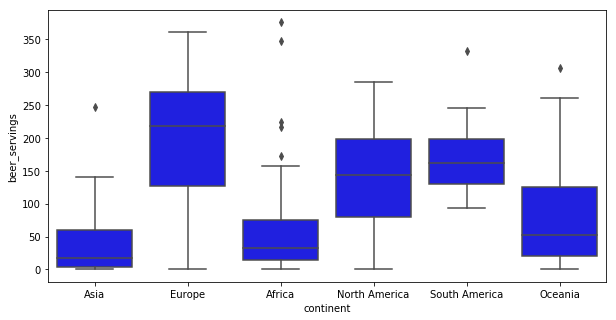

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

df_boxplot = df[['beer_servings','continent']]
df_boxplot

# spacing the continent for better readbility 
plt.figure(figsize=(10,5))

# box plot on beer servings by continent.  
sns.boxplot(x = 'continent' , y = "beer_servings", data = df_boxplot , color = 'blue')

<b>Question 5</b>: Use the function <code> regplot</code> in the seaborn library to determine if the number of wine servings is
negatively or positively correlated with the number of beer servings.

(0, 418.99237623339104)

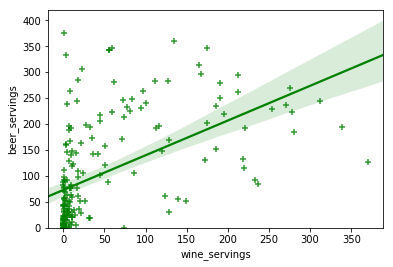

In [8]:
# indicates a positive direct correlation between two variables.   Only in some places only beer is served. 
# simplest model fit the regress y ~ x and plot the resulting regression line and a 95% confidence interval for that regression:


import seaborn as sns 

sns.regplot(y= 'beer_servings', x='wine_servings', data = df, x_jitter=.01, y_jitter=.04 , fit_reg = True , color="g", marker = '+', ci = 95)
plt.ylim(0)


<b> Question 6:</b> Fit a linear regression model to predict the <code>'total_litres_of_pure_alcohol'</code> using the number of <code>'wine_servings'</code> then calculate $R^{2}$:


In [9]:
# Simple linear regression model helps us to understand the relatonship between two variables 
# x - predictior 
# y - that we want to predict 

from sklearn.linear_model import LinearRegression

# create a linear regression object 
lm = LinearRegression()
lm

X = df[['wine_servings']]
Y = df[['total_litres_of_pure_alcohol']]

# fit a linear model using wine servings 
lm.fit(X,Y)

# output a prediction 
Yhat=lm.predict(X)
Yhat[0:5] 

# value of intercept A 
lm.intercept_
# 3.15407943

#value of slope B 
lm.coef_
# 0.03160757

Yhat= 3.15407943 + 0.03160757 *  X
Yhat

# Find the R^2
lm.score(X, Y)


# Final Outut 
print('The R-square is: ', lm.score(X, Y))
print('The intercept is: ', lm.intercept_)
print('The slope of value B is: ', lm.coef_)
print('The Yhat is: ', Yhat)

The R-square is:  0.4456875459787605
The intercept is:  [3.15407943]
The slope of value B is:  [[0.03160757]]
The Yhat is:       wine_servings
0         3.154079
1         4.860888
2         3.596585
3        13.015641
4         4.576420
5         4.576420
6        10.139352
7         3.501763
8         9.854884
9         9.191125
10        3.312117
11        4.766065
12        3.375332
13        3.154079
14        4.291952
15        4.481597
16        9.854884
17        3.406940
18        3.564978
19        3.154079
20        3.406940
21        3.406940
22        4.260344
23        3.659801
24        3.185687
25        6.125191
26        3.375332
27        3.154079
28        3.375332
29        3.659801
..             ...
163       3.375332
164       3.217295
165       9.033087
166      12.004199
167       3.659801
168       3.154079
169       3.185687
170       5.872330
171       3.280510
172       3.754623
173       3.312117
174       3.375332
175       3.786231
176       3.375332
17

### Question 7
Use the list of features to predict the <code>'total_litres_of_pure_alcohol'</code>, split the data into training and testing and determine the $R^2$ on the test data, using the provided code:

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# assign the total_litres_of_pure_alcohol to Y 
# assign the other columns to X 

X = df[['beer_servings', 'spirit_servings', 'wine_servings']]
Y = df[['total_litres_of_pure_alcohol']]


x_train1, x_test1, y_train1, y_test1 = train_test_split(X, Y, test_size=0.4, random_state=0) 
print("number of test samples :", x_test1.shape[0])
print()
print("number of training samples:",x_train1.shape[0])
print()

# creating a regression object 
lre=LinearRegression()
print("the linear regression object :", lre)
print()

# fit the model using the train dataset 
lre.fit(x_train1,y_train1)
print("The R^2 on test data is :", lre.score(x_test1,y_test1))
print()
print("The R^2 on train data is:", lre.score(x_train1,y_train1))

# The R ^ 2 on training data is higher than test data. Probably fitted noise in the training data set and hence low accuracy on test. 

number of test samples : 78

number of training samples: 115

the linear regression object : LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

The R^2 on test data is : 0.7370737388267039

The R^2 on train data is: 0.9471204262013297


<b>Question 8 :</b> Create a pipeline object that scales the data, performs a polynomial transform and fits a linear regression model. Fit the object using the training data in the question above, then calculate the R^2 using. the test data. Take a screenshot of your code and the $R^{2}$. There are some hints in the notebook:

<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple contains the model constructor

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# assign the total_litres_of_pure_alcohol to Y 
# assign the other columns to X 

X = df[['beer_servings', 'spirit_servings', 'wine_servings']]
Y = df[['total_litres_of_pure_alcohol']]

x_train1, x_test1, y_train1, y_test1 = train_test_split(X, Y, test_size=0.4, random_state=0) 

input =[('scale',StandardScaler()),('polynomial',PolynomialFeatures(include_bias=False,degree=2)),('model',LinearRegression())]


pipe = Pipeline(input)
pipe.fit(x_train1, y_train1)
yhat = pipe.predict(X)
print("R^2 using Test data is", pipe.score(x_test1, y_test1))
print()
print("R^2 using Training data is", pipe.score(x_train1, y_train1))

R^2 using Test data is 0.7594556586231647

R^2 using Training data is 0.9555197146227157


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64 were all

<b>Question 9</b>: Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1 and calculate the $R^{2}$ using the test data. Take a screenshot of your code and the $R^{2}$

In [12]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Ridge Regression we will see how the parameter Alfa changes the model. 
# Just a note here our test data will be used as validation data.

pr=PolynomialFeatures(degree=2)

X = df[['beer_servings', 'spirit_servings', 'wine_servings']]
Y = df[['total_litres_of_pure_alcohol']]

x_train1, x_test1, y_train1, y_test1 = train_test_split(X, Y, test_size=0.4, random_state=0) 

# Let's create a Ridge regression object, setting the regularization parameter to 0.1
RigeModel=Ridge(alpha=0.1)

#Like regular regression, you can fit the model using the method fit.
RigeModel.fit(x_train1, y_train1)

#Obtain a prediction
yhat = RigeModel.predict(x_test1)

# lets compare the first few samples to test dataset 
print('predicted:\n', yhat[0:4])
print()
print('test set :\n', y_test1[0:4].values)

# printing the r square
print()
print("RidgeModel for Test set R^2:",RigeModel.score(x_test1, y_test1))
print("RidgeModel for Train set R^2:",RigeModel.score(x_train1, y_train1))

predicted:
 [[0.34870451]
 [4.98745467]
 [8.43516648]
 [0.4546216 ]]

test set :
 [[0. ]
 [4.6]
 [8.2]
 [0.1]]

RidgeModel for Test set R^2: 0.7370737565866847
RidgeModel for Train set R^2: 0.9471204262013262


<b>Question 10 </b>: Perform a 2nd order polynomial transform on both the training data and testing data.  Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1. Calculate the $R^{2}$ utilizing the test data provided. Take a screen-shot of your code and the $R^{2}$. 

In [35]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

pr = PolynomialFeatures(degree=2)

X = df[['beer_servings', 'spirit_servings', 'wine_servings']]
Y = df[['total_litres_of_pure_alcohol']]

x_train1, x_test1, y_train1, y_test1 = train_test_split(X, Y, test_size=0.4, random_state=0) 

x_train_pr = pr.fit_transform(x_train1)
x_test_pr = pr.fit_transform(x_test1)

print(pr)

poly = LinearRegression()
poly.fit(x_train_pr, y_train1)

yhat = poly.predict(x_test_pr)
yhat[0:5]

print()
print("Predicted values:", yhat[0:4])
print()
print("True values:", y_test1[0:4].values)

print()
print("R^2 of the training data: ", poly.score(x_train_pr, y_train1))
print()
print("R^2 of the test data:", poly.score(x_test_pr, y_test1))


PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

Predicted values: [[0.28701361]
 [4.61300808]
 [8.49934388]
 [0.40634027]]

True values: [[0. ]
 [4.6]
 [8.2]
 [0.1]]

R^2 of the training data:  0.9555197146227157

R^2 of the test data: 0.7594556586231671


<a href="https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/share-notebooks.html\" > CLICK HERE </a>  to see how to share your notebook

<b>Sources</b>

<a href=https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/> Dear Mona Followup: Where Do People Drink The Most Beer, Wine And Spirits?</a> by By Mona Chalabi , you can download the dataset <a href=https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption>here</a>.